## Indian Liver Disease Patients: Clustering (3/5)
We implement clustering algorithms like K Means, DBSCAN and Agglomerative Hierarchical Clustering. Also, we visualize the data in 2-D, reducing the dimension with PCA.

### Import the modules

In [1]:
import numpy as np 
import pandas as pd 
import os
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_csv('../input/indian-liver-patients-feature-selection-part-2/liver_reduced_features.csv')
df.head()

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Albumin_and_Globulin_Ratio,liver_disease
0,65,0.7,187,16,0.90,1
1,62,10.9,699,64,0.74,1
2,62,7.3,490,60,0.89,1
3,58,1.0,182,14,1.00,1
4,72,3.9,195,27,0.40,1


### Data Scaling 

In [4]:
X = df.values[:, :-1] # numpy array
y = df.values[:,-1] # numpy array

In [5]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X.T).T 
X_scaled

array([[ 0.1569636 , -0.75393527,  1.88526318, -0.53718951, -0.751102  ],
       [-0.39436407, -0.58569025,  1.99066092, -0.38687576, -0.62373084],
       [-0.33578631, -0.63185502,  1.98080255, -0.34661149, -0.66654973],
       ...,
       [-0.19175452, -0.7572978 ,  1.94007856, -0.23593759, -0.75508865],
       [-0.26619121, -0.69915282,  1.96421708, -0.29534688, -0.70352617],
       [-0.2149449 , -0.66939983,  1.97135179, -0.42374851, -0.66325854]])

### Principal Components Analysis
In order to visualize the results, we have to reduce the dimensions. Our dataset (after feature selection) contains 6 independent variables, so we are in the 6 dimensional space. We will use Principal Component Analysis (PCA), in order to create new components where each new component will be a linear composition of the initial coordinate system. Then, we are going to check how much of the variation, the new components explain.

In [6]:
pca = PCA(n_components=2) #2-dimensional PCA transformation
X_pca = pd.DataFrame(pca.fit_transform(X_scaled))

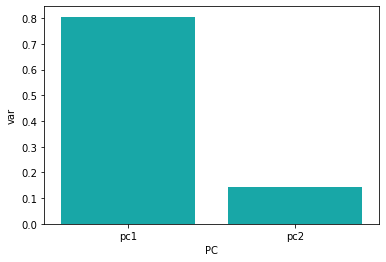

In [7]:
var = pd.DataFrame({'var':pca.explained_variance_ratio_,'PC':['pc1','pc2']})
sns.barplot(x='PC',y="var",data=var, color="c")
plt.show()

In [8]:
print(f'pca explains {round(pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1],2)*100}% of the initial variation of the data')

pca explains 95.0% of the initial variation of the data


## Plot Data in 2-D

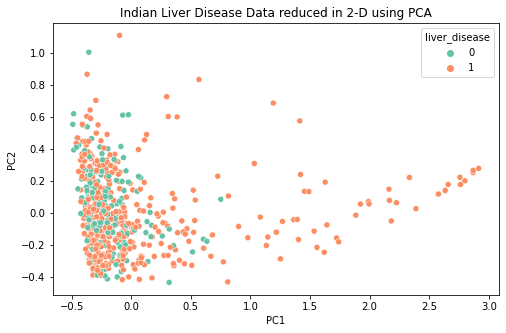

In [9]:
plt.figure(figsize=(8,5))
plt.title('Indian Liver Disease Data reduced in 2-D using PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')

sns.scatterplot(x=X_pca[0], y=X_pca[1], color='purple', hue = df.iloc[:,-1], palette = 'Set2')
plt.show()

## K Means Algorithm & Elbow Rule
K means is a quite simple unsupervised machine learning algorithm. It works as follows:
1. We define k, which is the number of clusters
2. The algorithm selects randomly k-points of the dataset and use them as initial centroids
3. The algorithm calculates the distance (we have to define a metric, a proximity measure) between the k centroids and all the other points of the dataset.
4. Each point is assigned to the cluster, in which it has the smallest distance from the controid
5. Reassignes the centroids. 
6. The algorith stops when the centroids do not change any more.


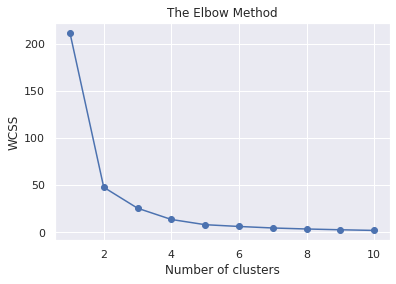

In [10]:
sns.set_theme()
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_pca.iloc[:,:-1])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

$ k $ is user defined parameter. We want to minimize an objective function known as intra cluster variation or within-cluster-sum of squares (WCSS) which is the sum of square distances of sample to their closest cluster center. </p>

The WCSS of $ k $ cluster is given by: $$ W(C_k) = \sum_{xi\ \in C_k}{(x_i-m_k)}^2 $$ 
The total WCSS for all the clusters: $$ \sum_{k=1}^{n}\sum_{xi\ \in C_k}{(x_i-m_k)}^2 $$ We want the last measure to be as small as possible.


<p> The graph above plots number of clusters as a function of WCSS. We will opt the number of clusters so that if i add one more cluster, the wcss will not improve that much. So we will choose  $ k=3 $.
    
## Implementation of Kmeans algorithm with $ k = 3 $
We use Euclidean distance as distance metric
    $$ \sqrt{\sum_{i=1}^{n}{(x_i-y_i)}^2} $$

In [11]:
kmeans = KMeans(n_clusters=3,  n_init=20,  precompute_distances=True, random_state=0, verbose=2)
kmeans.fit(X_pca)
k_means_labels = kmeans.labels_
centroids = kmeans.cluster_centers_
X_pca['target'] = df['liver_disease']

Initialization complete
Iteration 0, inertia 78.56766748398792
Iteration 1, inertia 61.63962141093727
Iteration 2, inertia 60.712657085798966
Iteration 3, inertia 59.75618732691388
Iteration 4, inertia 59.19042883278841
Iteration 5, inertia 58.752025573351666
Iteration 6, inertia 58.63266724447563
Iteration 7, inertia 58.57354263149494
Iteration 8, inertia 58.54468620129194
Converged at iteration 8: center shift 7.98993176410596e-06 within tolerance 2.13684539526313e-05.
Initialization complete
Iteration 0, inertia 74.16117160489937
Iteration 1, inertia 63.005106028571404
Iteration 2, inertia 62.1717920166582
Iteration 3, inertia 62.087418259286764
Iteration 4, inertia 62.0846585768157
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 74.78838473690628
Iteration 1, inertia 62.249153451221915
Iteration 2, inertia 62.12071069831267
Iteration 3, inertia 62.08970007682238
Iteration 4, inertia 62.07781243782841
Converged at iteration 4: strict conver

/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:934: FutureWarning:

'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect



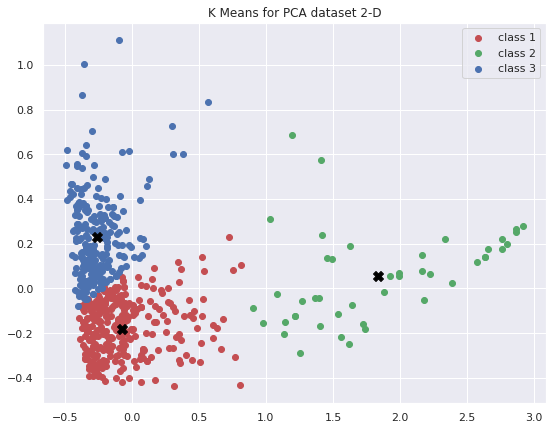

In [12]:
plt.figure(figsize = (9,7))
## plot the clusters

plt.scatter(x = X_pca[k_means_labels == 0][0], y = X_pca[k_means_labels == 0][1], c = 'r', label = 'class 1')
plt.scatter(x = X_pca[k_means_labels == 1][0], y = X_pca[k_means_labels == 1][1], c = 'g', label = 'class 2')
plt.scatter(x = X_pca[k_means_labels == 2][0], y = X_pca[k_means_labels == 2][1], c = 'b', label = 'class 3')

##plot the centroids

plt.scatter(x =centroids[0][0], y = centroids[0][1], c = 'black', marker = 'X', s=100 )
plt.scatter(x =centroids[1][0], y = centroids[1][1], c = 'black' , marker = 'X',s=100)
plt.scatter(x =centroids[2][0], y = centroids[2][1] ,c='black',  marker = 'X', s=100)
plt.title('K Means for PCA dataset 2-D')
plt.legend()
plt.show()

K means clustering seems to not distinguish the classes. 
## DBSCAN 
In order to understand how DBSCAN works, we have to define the folloing:
* ***MinPts***: minimun number of points (neighbors) that must exist within a circe of radius *eps* and center a specific point in order to classify it as core point.
* ***eps*** defines the radius of neighborhood around a point x.

We classify all the points of a dataset as:
1. **core point**: if there are at least ***MinPts*** points within a circle of radius ***eps***.
1. **border point**: if it contains at least 1 core point in its neighbor.
3. **noise point**: if it is neither a core point nor a border point.

### DBSCAN Algorithm (simplified)
1. Scan the database.
2. Assign each point to one of the following categories: core point, border point or noise.
3. Reject all the noise points.
4. Connect all the core points within a distance ε and create a separate cluster.
5. Assign each border point to the cluster which is reachable from a core point.


## Determing the value of eps

In [13]:
from sklearn.neighbors import NearestNeighbors

In [14]:
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(X_pca.iloc[:,:-1])
distances, indices = nbrs.kneighbors(X_pca.iloc[:,:-1])

In [15]:
distances = np.sort(distances[:,-1], axis = 0)

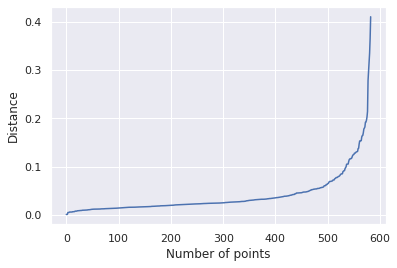

In [16]:
plt.plot(distances)
plt.xlabel('Number of points')
plt.ylabel('Distance')
plt.show()

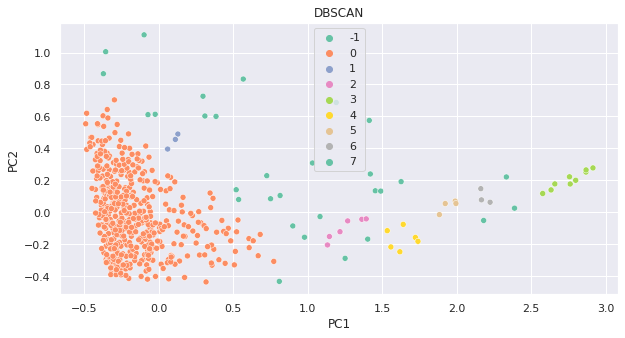

In [17]:
db = DBSCAN(eps=0.12, min_samples=3)
y_pred = db.fit_predict(X_pca.iloc[:,:-1])
plt.figure(figsize=(10,5))
sns.scatterplot(x = X_pca[0], y = X_pca[1],hue =y_pred, palette= 'Set2', color='purple')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("DBSCAN")
plt.show()

DBSCAN considers dense region as one cluster

## Agglomerative Hierarchical Clustering
Lastly, we are going to implement Agglomerative Hierarchical Clustering. This type of algorithm starts by classify every single point as an individual cluster. In every step we calculate the so-called the proximity matrix which stores the distance between every cluster. In each step we merge the closest clusters, by implementing a distance metric. In the last step, all the points are assigned to one and only cluster.

In [18]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_pca.iloc[:,:-1])

In [19]:
Z = linkage(X_pca.iloc[:,:-1], 'ward')

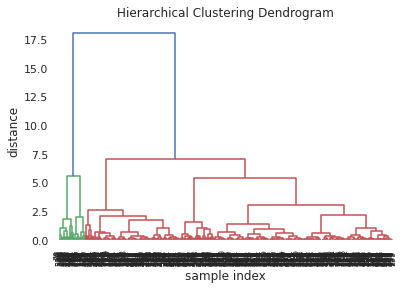

In [20]:
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

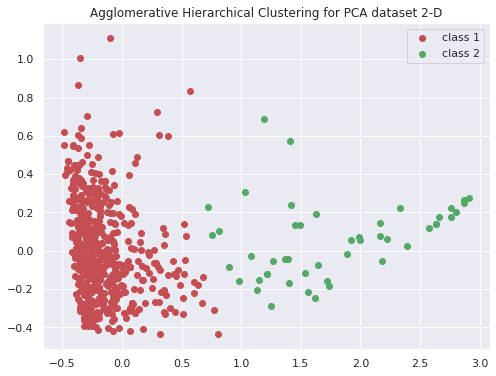

In [21]:
plt.figure(figsize = (8,6))
## plot the clusters
plt.scatter(x = X_pca[y_hc == 0][0], y = X_pca[y_hc == 0][1], c = 'r', label = 'class 1')
plt.scatter(x = X_pca[y_hc == 1][0], y = X_pca[y_hc == 1][1], c = 'g', label = 'class 2')


plt.title('Agglomerative Hierarchical Clustering for PCA dataset 2-D')
plt.legend()
plt.show()

### Putting it all together:
None of the clustering algorithms seems to find the real classes. PCA was very informative because we understand that:
* the classes are overlapping
* there is noise

### ~ end of clustering ~